In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import files
# uploaded = files.upload()

df = pd.read_csv('ford.csv')

Saving ford.csv to ford.csv


# EDA

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2
17965,Focus,2015,8299,Manual,5007,Petrol,22,57.7,1.0


In [ ]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [ ]:
df.shape

(17966, 9)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(17812, 9)

In [ ]:
df.dtypes

,0
model,object
year,int64
price,int64
transmission,object
mileage,int64
fuelType,object
tax,int64
mpg,float64
engineSize,float64


In [ ]:
# drop 2060 cloumn
df = df[df['year'] != 2060]

# DATA Visualization

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


Text(0.5, 1.0, 'Price vs Mileage')

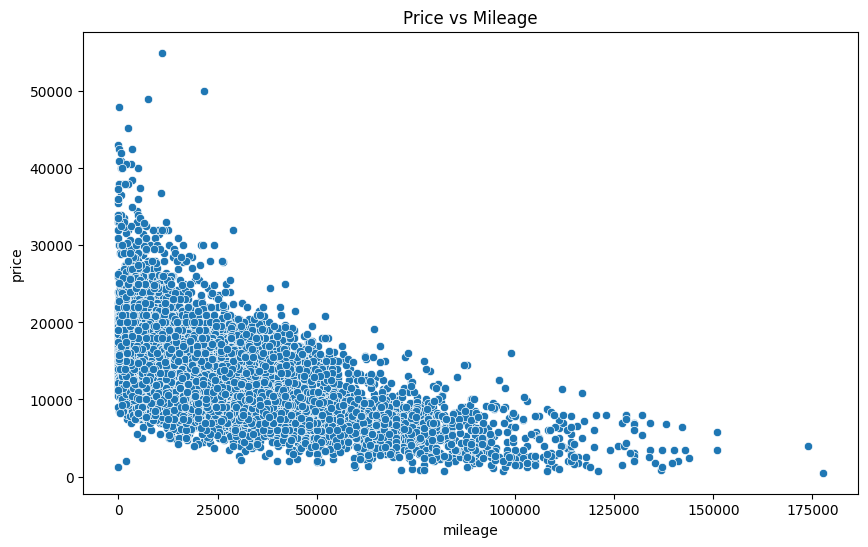

In [ ]:
# scatter plot between price and mileage
plt.figure(figsize=(10,6))
sns.scatterplot(x='mileage', y='price', data=df)
plt.title('Price vs Mileage')

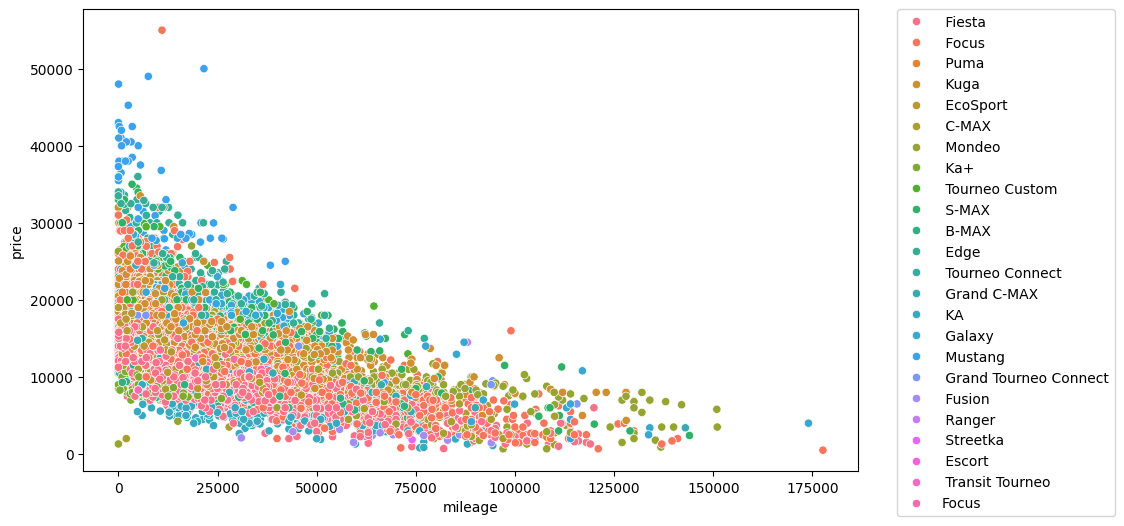

In [ ]:
# scatter plot with hue = fuelType
plt.figure(figsize=(10,6))
# place the legend out of the plot
sns.scatterplot(x='mileage', y='price', hue='model', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
fig = px.scatter(df, x='mpg', y='price', color='model')
fig.show()

Text(0.5, 1.0, 'Price Density')

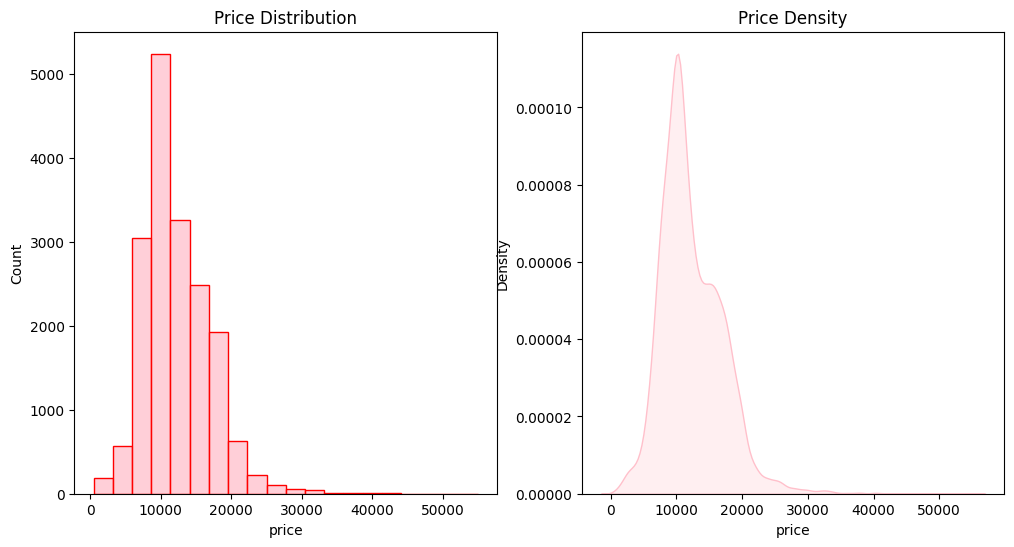

In [ ]:
#distribution of price
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df['price'], bins=20, color='pink',edgecolor='red')
plt.title('Price Distribution')

plt.subplot(1,2,2)
sns.kdeplot(df['price'], color = 'pink', fill=True)
plt.title('Price Density')

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
year_mean_price = df.groupby('year')['price'].mean().reset_index()
year_mean_price

,year,price
0,1996,3000.000000
1,1998,2699.000000
2,2000,1995.000000
3,2002,1928.333333
4,2003,2063.000000
5,2004,1436.000000
6,2005,1593.000000
7,2006,2202.615385
8,2007,2603.562500
9,2008,2613.250000


In [ ]:
fig = px.line(year_mean_price, x='year', y='price', title='Mean Price by Year',)
fig.show()

Text(0.5, 1.0, 'Number of Cars by Year')

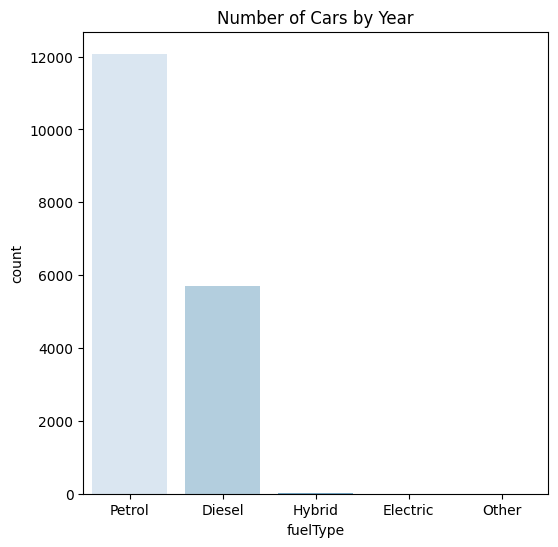

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='fuelType', data=df,palette='Blues')
plt.title('Number of Cars by Year')

Text(0.5, 1.0, 'Number of Cars by Year')

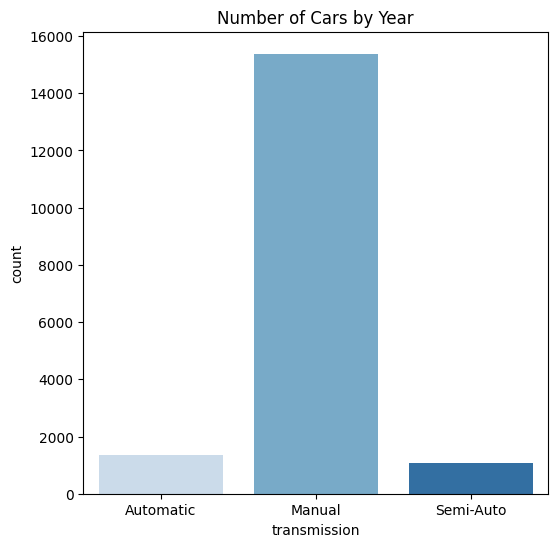

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='transmission', data=df,palette='Blues')
plt.title('Number of Cars by Year')

Text(0.5, 1.0, 'Count of each car')

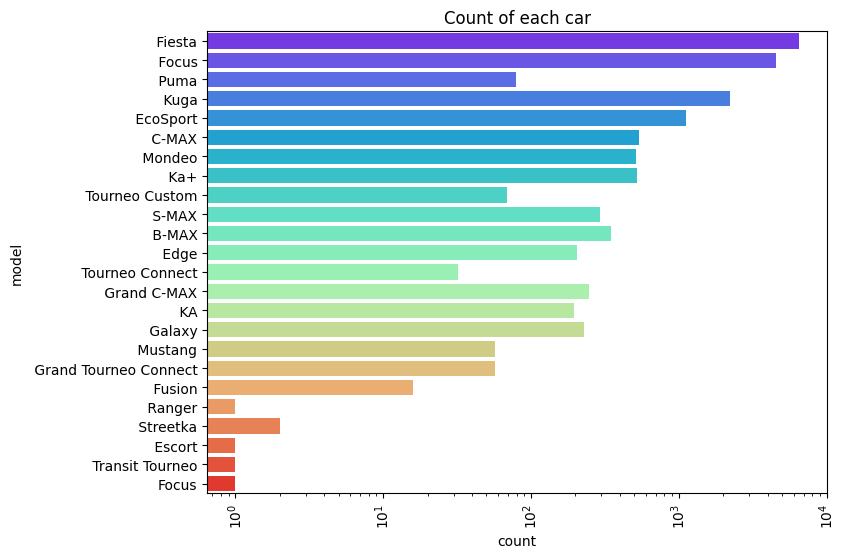

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y='model', data=df,palette='rainbow')
plt.xticks(rotation= 90)
plt.xscale('log')
plt.title('Count of each car')

In [ ]:
# Number of car by each year
car_par_year = df.groupby('year')['model'].count().reset_index()
car_par_year

,year,model
0,1996,1
1,1998,1
2,2000,1
3,2002,3
4,2003,3
5,2004,4
6,2005,16
7,2006,13
8,2007,32
9,2008,56


In [ ]:
df[df['year'] == 2060]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [ ]:
# Number of car by each year
car_par_year = df.groupby('year')['model'].count().reset_index()
car_par_year

,year,model
0,1996,1
1,1998,1
2,2000,1
3,2002,3
4,2003,3
5,2004,4
6,2005,16
7,2006,13
8,2007,32
9,2008,56


Text(0.5, 1.0, 'Number of Car Production by Year')

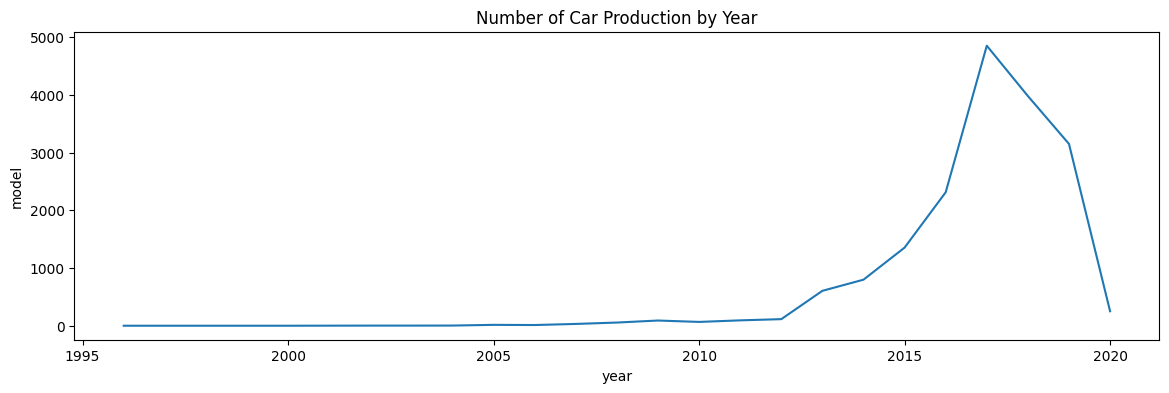

In [ ]:
# line plot for number of car production by each year
plt.figure(figsize=(14,4))
sns.lineplot(x='year', y='model', data=car_par_year)
plt.title('Number of Car Production by Year')

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
df['mpg'].value_counts()

,count
mpg,
65.7,2507
54.3,1761
60.1,1661
64.2,989
57.7,952
...,...
69.0,1
28.0,1
54.2,1


In [ ]:
# BOX PLOT OF MODEL VS PRICE
fig = px.box(df, x='model', y='price', color='model', title='Price Distribution by Model')
fig.show()

In [ ]:
# BOX PLOT OF fuelType VS PRICE
fig = px.box(df, x='fuelType', y='price', title='Price Distribution by Model')
fig.show()

In [ ]:
# group tax by model
mean_tax = df.groupby('model')['tax'].mean().reset_index()
mean_tax

,model,tax
0,B-MAX,90.871429
1,C-MAX,71.808118
2,EcoSport,136.308784
3,Edge,156.804878
4,Escort,265.000000
5,Fiesta,100.821297
6,Focus,111.150384
7,Fusion,183.750000
8,Galaxy,145.947137
9,Grand C-MAX,72.834008


In [ ]:
fig = px.line(mean_tax,y='tax', x='model', title='Mean Tax by model')
fig.show()

In [ ]:
df.head(

)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


<Axes: xlabel='engineSize', ylabel='price'>

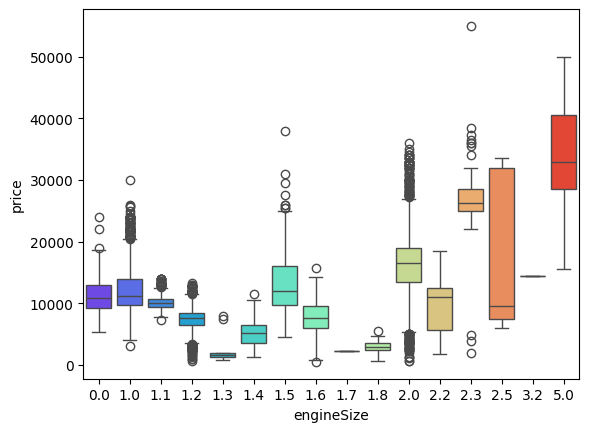

In [ ]:
# distribution of price by engine size
sns.boxplot(x='engineSize', y='price', data=df,palette='rainbow')

<Axes: >

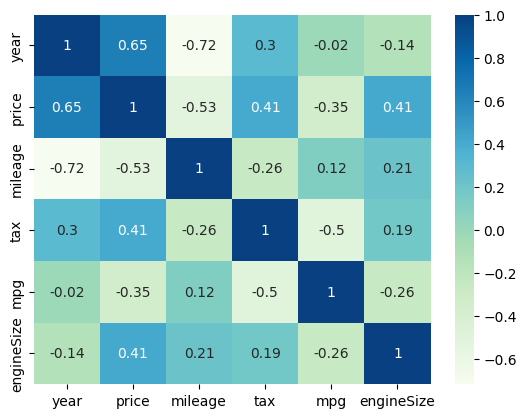

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='GnBu')

In [ ]:
# sunbust chart
fig = px.sunburst(df, path=['transmission', 'fuelType', 'model'], values='price')
fig.show()

# Data PreProcessing And Feature Engineering

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
bins = [0, 15, 25, 35, float('inf')]   # ranges
labels = ['Low MPG', 'Moderate MPG', 'High MPG', 'Very High MPG']

df['mpg_cat'] = pd.cut(df['mpg'], bins=bins, labels=labels)

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,mpg_cat
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,Very High MPG
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,Very High MPG
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,Very High MPG
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,Very High MPG
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,Very High MPG


In [ ]:
df['engineSize'].describe()

,engineSize
count,17811.000000
mean,1.350620
std,0.432593
min,0.000000
25%,1.000000
50%,1.200000
75%,1.500000
max,5.000000


In [ ]:
df[df['engineSize'] == 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,mpg_cat
13862,Kuga,2019,18990,Manual,8389,Petrol,150,35.3,0.0,Very High MPG
14064,Focus,2016,15500,Manual,28344,Diesel,20,67.3,0.0,Very High MPG
14082,Focus,2015,14300,Manual,40457,Diesel,20,67.3,0.0,Very High MPG
15343,KA,2018,10000,Manual,10051,Petrol,150,43.5,0.0,Very High MPG
15500,EcoSport,2015,8500,Manual,33403,Diesel,30,61.4,0.0,Very High MPG
15775,Focus,2017,13000,Manual,24484,Diesel,145,70.6,0.0,Very High MPG
16312,Focus,2015,9170,Manual,28000,Petrol,20,61.4,0.0,Very High MPG
16313,Focus,2019,18699,Manual,10000,Petrol,145,46.3,0.0,Very High MPG
16321,Fiesta,2017,9899,Manual,10000,Petrol,0,65.7,0.0,Very High MPG
16322,Ka+,2018,9999,Manual,15000,Petrol,145,43.5,0.0,Very High MPG


In [ ]:
petrol_mean = df[(df['fuelType'] == 'Petrol') & (df['engineSize'] != 0.0)]['engineSize'].mean()
petrol_mean = round(petrol_mean, 1)
print(petrol_mean)

1.2


In [ ]:
df['engineSize'].replace(0, petrol_mean, inplace=True)

In [ ]:
df[df['engineSize'] == 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,mpg_cat


In [ ]:
df[df['mpg'] == 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,mpg_cat


In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,mpg_cat
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,Very High MPG
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,Very High MPG
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,Very High MPG
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,Very High MPG
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,Very High MPG


In [ ]:
bins = [0, 1.5, 2.5, 4.0, np.inf]
labels = ['Small Engine', 'Medium Engine', 'Large Engine', 'Very Large Engine']
df['engine_size_cat'] = pd.cut(df['engineSize'], bins=bins, labels=labels)

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,mpg_cat,engine_size_cat
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,Very High MPG,Small Engine
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,Very High MPG,Small Engine
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,Very High MPG,Small Engine
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,Very High MPG,Small Engine
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,Very High MPG,Small Engine


In [ ]:
bins = [0, 12000, 18000, 25000, float('inf')]
labels = ['Low Mileage', 'Moderate Mileage', 'High Mileage', 'Very High Mileage']
df['mileage_cat'] = pd.cut(df['mileage'], bins=bins, labels=labels)

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,mpg_cat,engine_size_cat,mileage_cat
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,Very High MPG,Small Engine,Moderate Mileage
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,Very High MPG,Small Engine,Low Mileage
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,Very High MPG,Small Engine,Moderate Mileage
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,Very High MPG,Small Engine,Low Mileage
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,Very High MPG,Small Engine,Low Mileage


In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df.head()

,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,fuelType_Petrol,mpg_cat_Moderate MPG,mpg_cat_High MPG,mpg_cat_Very High MPG,engine_size_cat_Medium Engine,engine_size_cat_Large Engine,engine_size_cat_Very Large Engine,mileage_cat_Moderate Mileage,mileage_cat_High Mileage,mileage_cat_Very High Mileage
0,2017,12000,15944,150,57.7,1.0,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
1,2018,14000,9083,150,57.7,1.0,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
2,2017,13000,12456,150,57.7,1.0,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
3,2019,17500,10460,145,40.3,1.5,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,2019,16500,1482,145,48.7,1.0,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False


In [ ]:
df.columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ C-MAX',
       'model_ EcoSport', 'model_ Edge', 'model_ Escort', 'model_ Fiesta',
       'model_ Focus', 'model_ Fusion', 'model_ Galaxy', 'model_ Grand C-MAX',
       'model_ Grand Tourneo Connect', 'model_ KA', 'model_ Ka+',
       'model_ Kuga', 'model_ Mondeo', 'model_ Mustang', 'model_ Puma',
       'model_ Ranger', 'model_ S-MAX', 'model_ Streetka',
       'model_ Tourneo Connect', 'model_ Tourneo Custom',
       'model_ Transit Tourneo', 'model_Focus', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Electric', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol', 'mpg_cat_Moderate MPG',
       'mpg_cat_High MPG', 'mpg_cat_Very High MPG',
       'engine_size_cat_Medium Engine', 'engine_size_cat_Large Engine',
       'engine_size_cat_Very Large Engine', 'mileage_cat_Moderate Mileage',
       'mileage_cat_High Mileage', 'mileage_cat_Very High Mileage'],
      dtype='object')

In [ ]:
# change all boolean value to integer without changing other value
df = df.astype(int)

In [ ]:
df.head()

,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,fuelType_Petrol,mpg_cat_Moderate MPG,mpg_cat_High MPG,mpg_cat_Very High MPG,engine_size_cat_Medium Engine,engine_size_cat_Large Engine,engine_size_cat_Very Large Engine,mileage_cat_Moderate Mileage,mileage_cat_High Mileage,mileage_cat_Very High Mileage
0,2017,12000,15944,150,57,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,2018,14000,9083,150,57,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,2017,13000,12456,150,57,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,2019,17500,10460,145,40,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,2019,16500,1482,145,48,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [ ]:
list(df.columns)

['year',
 'price',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'model_ C-MAX',
 'model_ EcoSport',
 'model_ Edge',
 'model_ Escort',
 'model_ Fiesta',
 'model_ Focus',
 'model_ Fusion',
 'model_ Galaxy',
 'model_ Grand C-MAX',
 'model_ Grand Tourneo Connect',
 'model_ KA',
 'model_ Ka+',
 'model_ Kuga',
 'model_ Mondeo',
 'model_ Mustang',
 'model_ Puma',
 'model_ Ranger',
 'model_ S-MAX',
 'model_ Streetka',
 'model_ Tourneo Connect',
 'model_ Tourneo Custom',
 'model_ Transit Tourneo',
 'model_Focus',
 'transmission_Manual',
 'transmission_Semi-Auto',
 'fuelType_Electric',
 'fuelType_Hybrid',
 'fuelType_Other',
 'fuelType_Petrol',
 'mpg_cat_Moderate MPG',
 'mpg_cat_High MPG',
 'mpg_cat_Very High MPG',
 'engine_size_cat_Medium Engine',
 'engine_size_cat_Large Engine',
 'engine_size_cat_Very Large Engine',
 'mileage_cat_Moderate Mileage',
 'mileage_cat_High Mileage',
 'mileage_cat_Very High Mileage']

In [ ]:
from scipy.stats import pearsonr

selected_feature = [col for col in df.columns if col not in ['price']]


correlation = {
    feature : pearsonr(df[feature], df['price'])[0]
    for feature in selected_feature
}

correlation_df = pd.DataFrame(list(correlation.items()), columns=['feature', 'correlation'])
correlation_df = correlation_df.sort_values(by='correlation', ascending=False)
correlation_df

,feature,correlation
0,year,0.645236
4,engineSize,0.500055
2,tax,0.406112
17,model_ Kuga,0.281914
37,engine_size_cat_Medium Engine,0.270448
19,model_ Mustang,0.267527
34,mpg_cat_Moderate MPG,0.243148
39,engine_size_cat_Very Large Engine,0.241200
7,model_ Edge,0.237870
35,mpg_cat_High MPG,0.201751


In [ ]:
high_correlation_features = correlation_df[abs(correlation_df['correlation']) > 0.23]

In [ ]:
column = high_correlation_features['feature'].tolist()
column

['year',
 'engineSize',
 'tax',
 'model_ Kuga',
 'engine_size_cat_Medium Engine',
 'model_ Mustang',
 'mpg_cat_Moderate MPG',
 'engine_size_cat_Very Large Engine',
 'model_ Edge',
 'transmission_Manual',
 'mpg_cat_Very High MPG',
 'model_ Fiesta',
 'mpg',
 'mileage_cat_Very High Mileage',
 'mileage']

In [ ]:
# chi Square test for categorical column
from scipy.stats import chi2_contingency


col = ['model_ C-MAX',
 'model_ EcoSport',
 'model_ Edge',
 'model_ Escort',
 'model_ Fiesta',
 'model_ Focus',
 'model_ Fusion',
 'model_ Galaxy',
 'model_ Grand C-MAX',
 'model_ Grand Tourneo Connect',
 'model_ KA',
 'model_ Ka+',
 'model_ Kuga',
 'model_ Mondeo',
 'model_ Mustang',
 'model_ Puma',
 'model_ Ranger',
 'model_ S-MAX',
 'model_ Streetka',
 'model_ Tourneo Connect',
 'model_ Tourneo Custom',
 'model_ Transit Tourneo',
 'model_Focus',
 'transmission_Manual',
 'transmission_Semi-Auto',
 'fuelType_Electric',
 'fuelType_Hybrid',
 'fuelType_Other',
 'fuelType_Petrol',
 'mpg_cat_Moderate MPG',
 'mpg_cat_High MPG',
 'mpg_cat_Very High MPG',
 'engine_size_cat_Medium Engine',
 'engine_size_cat_Large Engine',
 'engine_size_cat_Very Large Engine',
 'mileage_cat_Moderate Mileage',
 'mileage_cat_High Mileage',
 'mileage_cat_Very High Mileage']

In [ ]:
alpha = 0.5

df['price_bin'] = pd.qcut(df['price'], q=2, labels=False)

chi_result = {}

for c in col:
    contingency = pd.crosstab(df[c], df['price_bin'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    decision = 'Reject Null Hypothesis(Keep Feature)' if p < alpha else 'Accept Null(Drop Feature)'
    chi_result[c] = {'chi2': chi2, 'p_value': p, 'decision': decision}

chi_result_df = pd.DataFrame(chi_result).T
chi_result_df = chi_result_df.sort_values(by='p_value')
chi_result_df

,chi2,p_value,decision
mileage_cat_Very High Mileage,2442.898587,0.0,Reject Null Hypothesis(Keep Feature)
model_ Fiesta,1765.951169,0.0,Reject Null Hypothesis(Keep Feature)
model_ Kuga,1499.593845,0.0,Reject Null Hypothesis(Keep Feature)
engine_size_cat_Medium Engine,723.523776,0.0,Reject Null Hypothesis(Keep Feature)
transmission_Manual,592.999743,0.0,Reject Null Hypothesis(Keep Feature)
model_ Focus,492.588614,0.0,Reject Null Hypothesis(Keep Feature)
fuelType_Petrol,491.597036,0.0,Reject Null Hypothesis(Keep Feature)
model_ Ka+,395.312873,0.0,Reject Null Hypothesis(Keep Feature)
model_ Edge,205.391793,0.0,Reject Null Hypothesis(Keep Feature)
model_ S-MAX,194.284624,0.0,Reject Null Hypothesis(Keep Feature)


In [ ]:
selectFea = chi_result_df['decision'] == 'Reject Null Hypothesis(Keep Feature)'
selectFea

,decision
mileage_cat_Very High Mileage,True
model_ Fiesta,True
model_ Kuga,True
engine_size_cat_Medium Engine,True
transmission_Manual,True
model_ Focus,True
fuelType_Petrol,True
model_ Ka+,True
model_ Edge,True
model_ S-MAX,True


In [ ]:
colm = ['mileage_cat_Very High Mileage',
 'model_ Fiesta',
 'model_ Kuga',
 'engine_size_cat_Medium Engine',
 'transmission_Manual',
 'model_ Focus',
 'fuelType_Petrol',
 'model_ Ka+',
 'model_ Edge',
 'model_ S-MAX',
 'model_ KA',
 'mpg_cat_Very High MPG',
 'transmission_Semi-Auto',
 'model_ Galaxy',
 'mpg_cat_High MPG',
 'model_ C-MAX',
 'mileage_cat_Moderate Mileage',
 'mileage_cat_High Mileage',
 'model_ Puma',
 'model_ Tourneo Custom',
 'model_ Mustang',
 'engine_size_cat_Very Large Engine',
 'mpg_cat_Moderate MPG',
 'model_ Grand Tourneo Connect',
 'model_ Fusion',
 'model_ Grand C-MAX',
 'fuelType_Hybrid',
 'model_ Tourneo Connect',
 'model_ EcoSport',
 'model_ Mondeo',
 'fuelType_Electric',
 'model_ Streetka']

In [ ]:
selected_features = list(set(column + colm))
print(selected_features)

['mileage_cat_Moderate Mileage', 'model_ Puma', 'model_ Streetka', 'year', 'fuelType_Petrol', 'model_ Mondeo', 'model_ Fiesta', 'model_ Fusion', 'model_ Grand C-MAX', 'engine_size_cat_Medium Engine', 'engine_size_cat_Very Large Engine', 'mileage', 'model_ EcoSport', 'transmission_Semi-Auto', 'model_ Mustang', 'mpg_cat_Moderate MPG', 'model_ C-MAX', 'transmission_Manual', 'mpg_cat_Very High MPG', 'model_ Focus', 'model_ Grand Tourneo Connect', 'fuelType_Electric', 'model_ Kuga', 'mileage_cat_Very High Mileage', 'fuelType_Hybrid', 'model_ S-MAX', 'model_ KA', 'model_ Tourneo Custom', 'mpg', 'engineSize', 'tax', 'mpg_cat_High MPG', 'mileage_cat_High Mileage', 'model_ Tourneo Connect', 'model_ Galaxy', 'model_ Ka+', 'model_ Edge']


In [ ]:
final_df = df[selected_features + ['price']]

In [ ]:
final_df.head()

,mileage_cat_Moderate Mileage,model_ Puma,model_ Streetka,year,fuelType_Petrol,model_ Mondeo,model_ Fiesta,model_ Fusion,model_ Grand C-MAX,engine_size_cat_Medium Engine,...,mpg,engineSize,tax,mpg_cat_High MPG,mileage_cat_High Mileage,model_ Tourneo Connect,model_ Galaxy,model_ Ka+,model_ Edge,price
0,1,0,0,2017,1,0,1,0,0,0,...,57,1,150,0,0,0,0,0,0,12000
1,0,0,0,2018,1,0,0,0,0,0,...,57,1,150,0,0,0,0,0,0,14000
2,1,0,0,2017,1,0,0,0,0,0,...,57,1,150,0,0,0,0,0,0,13000
3,0,0,0,2019,1,0,1,0,0,0,...,40,1,145,0,0,0,0,0,0,17500
4,0,0,0,2019,1,0,1,0,0,0,...,48,1,145,0,0,0,0,0,0,16500


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
cols = ['year','mileage','tax','mpg','engineSize']
scaler = StandardScaler()
final_df[cols] = scaler.fit_transform(final_df[cols])


In [ ]:
final_df.head()

,mileage_cat_Moderate Mileage,model_ Puma,model_ Streetka,year,fuelType_Petrol,model_ Mondeo,model_ Fiesta,model_ Fusion,model_ Grand C-MAX,engine_size_cat_Medium Engine,...,mpg,engineSize,tax,mpg_cat_High MPG,mileage_cat_High Mileage,model_ Tourneo Connect,model_ Galaxy,model_ Ka+,model_ Edge,price
0,1,0,0,0.069100,1,0,1,0,0,0,...,-0.042378,-0.458207,0.591483,0,0,0,0,0,0,12000
1,0,0,0,0.562581,1,0,0,0,0,0,...,-0.042378,-0.458207,0.591483,0,0,0,0,0,0,14000
2,1,0,0,0.069100,1,0,0,0,0,0,...,-0.042378,-0.458207,0.591483,0,0,0,0,0,0,13000
3,0,0,0,1.056062,1,0,1,0,0,0,...,-1.720342,-0.458207,0.510877,0,0,0,0,0,0,17500
4,0,0,0,1.056062,1,0,1,0,0,0,...,-0.930712,-0.458207,0.510877,0,0,0,0,0,0,16500


In [ ]:
x = final_df.drop('price', axis=1)
y = final_df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
n = x_train.shape[0]  # number of samples
p = x_train.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [ ]:
print("r2 = ",r2,"   Adjusted_r2 =",adj_r2)

r2 =  0.8674794480613979    Adjusted_r2 = 0.8671343910296084


# Hit and Try

In [ ]:
df.head()

,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,mpg_cat_Moderate MPG,mpg_cat_High MPG,mpg_cat_Very High MPG,engine_size_cat_Medium Engine,engine_size_cat_Large Engine,engine_size_cat_Very Large Engine,mileage_cat_Moderate Mileage,mileage_cat_High Mileage,mileage_cat_Very High Mileage,price_bin
0,2017,12000,15944,150,57,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,2018,14000,9083,150,57,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2017,13000,12456,150,57,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2019,17500,10460,145,40,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,2019,16500,1482,145,48,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
from datetime import datetime

current_year = datetime.now().year  # e.g., 2025

# 1️⃣ Convert Year → Car Age (numeric)
df['car_age'] = current_year - df['year']

# 2️⃣ Convert Year → Age Category (qualitative bins)
bins = [0, 5, 10, 20, float('inf')]
labels = ['New (0-5 yrs)', 'Moderately New (6-10 yrs)', 'Old (11-20 yrs)', 'Very Old (20+ yrs)']

df['age_category'] = pd.cut(df['car_age'], bins=bins, labels=labels, right=True)

In [ ]:
df.head()

,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,mpg_cat_Very High MPG,engine_size_cat_Medium Engine,engine_size_cat_Large Engine,engine_size_cat_Very Large Engine,mileage_cat_Moderate Mileage,mileage_cat_High Mileage,mileage_cat_Very High Mileage,price_bin,car_age,age_category
0,2017,12000,15944,150,57,1,0,0,0,0,...,1,0,0,0,1,0,0,1,8,Moderately New (6-10 yrs)
1,2018,14000,9083,150,57,1,0,0,0,0,...,1,0,0,0,0,0,0,1,7,Moderately New (6-10 yrs)
2,2017,13000,12456,150,57,1,0,0,0,0,...,1,0,0,0,1,0,0,1,8,Moderately New (6-10 yrs)
3,2019,17500,10460,145,40,1,0,0,0,0,...,1,0,0,0,0,0,0,1,6,Moderately New (6-10 yrs)
4,2019,16500,1482,145,48,1,0,0,0,0,...,1,0,0,0,0,0,0,1,6,Moderately New (6-10 yrs)


In [ ]:
df = pd.get_dummies(df, drop_first=True,columns=['age_category'])

In [ ]:
df.head()

,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,engine_size_cat_Large Engine,engine_size_cat_Very Large Engine,mileage_cat_Moderate Mileage,mileage_cat_High Mileage,mileage_cat_Very High Mileage,price_bin,car_age,age_category_Moderately New (6-10 yrs),age_category_Old (11-20 yrs),age_category_Very Old (20+ yrs)
0,2017,12000,15944,150,57,1,0,0,0,0,...,0,0,1,0,0,1,8,True,False,False
1,2018,14000,9083,150,57,1,0,0,0,0,...,0,0,0,0,0,1,7,True,False,False
2,2017,13000,12456,150,57,1,0,0,0,0,...,0,0,1,0,0,1,8,True,False,False
3,2019,17500,10460,145,40,1,0,0,0,0,...,0,0,0,0,0,1,6,True,False,False
4,2019,16500,1482,145,48,1,0,0,0,0,...,0,0,0,0,0,1,6,True,False,False


In [ ]:
df.astype(int)

,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,engine_size_cat_Large Engine,engine_size_cat_Very Large Engine,mileage_cat_Moderate Mileage,mileage_cat_High Mileage,mileage_cat_Very High Mileage,price_bin,car_age,age_category_Moderately New (6-10 yrs),age_category_Old (11-20 yrs),age_category_Very Old (20+ yrs)
0,2017,12000,15944,150,57,1,0,0,0,0,...,0,0,1,0,0,1,8,1,0,0
1,2018,14000,9083,150,57,1,0,0,0,0,...,0,0,0,0,0,1,7,1,0,0
2,2017,13000,12456,150,57,1,0,0,0,0,...,0,0,1,0,0,1,8,1,0,0
3,2019,17500,10460,145,40,1,0,0,0,0,...,0,0,0,0,0,1,6,1,0,0
4,2019,16500,1482,145,48,1,0,0,0,0,...,0,0,0,0,0,1,6,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,8999,16700,150,47,1,0,0,0,0,...,0,0,1,0,0,0,8,1,0,0
17962,2014,7499,40700,30,57,1,0,0,0,0,...,0,0,0,0,1,0,11,0,1,0
17963,2015,9999,7010,20,67,1,0,0,0,0,...,0,0,0,0,0,0,10,1,0,0
17964,2018,8299,5007,145,57,1,0,0,0,0,...,0,0,0,0,0,0,7,1,0,0


In [ ]:
selected_second_feature = selected_features + ['age_category_Moderately New (6-10 yrs)',	'age_category_Old (11-20 yrs)',	'age_category_Very Old (20+ yrs)']

In [ ]:
selected_second_feature

['mileage_cat_Moderate Mileage',
 'model_ Puma',
 'model_ Streetka',
 'year',
 'fuelType_Petrol',
 'model_ Mondeo',
 'model_ Fiesta',
 'model_ Fusion',
 'model_ Grand C-MAX',
 'engine_size_cat_Medium Engine',
 'engine_size_cat_Very Large Engine',
 'mileage',
 'model_ EcoSport',
 'transmission_Semi-Auto',
 'model_ Mustang',
 'mpg_cat_Moderate MPG',
 'model_ C-MAX',
 'transmission_Manual',
 'mpg_cat_Very High MPG',
 'model_ Focus',
 'model_ Grand Tourneo Connect',
 'fuelType_Electric',
 'model_ Kuga',
 'mileage_cat_Very High Mileage',
 'fuelType_Hybrid',
 'model_ S-MAX',
 'model_ KA',
 'model_ Tourneo Custom',
 'mpg',
 'engineSize',
 'tax',
 'mpg_cat_High MPG',
 'mileage_cat_High Mileage',
 'model_ Tourneo Connect',
 'model_ Galaxy',
 'model_ Ka+',
 'model_ Edge',
 'age_category_Moderately New (6-10 yrs)',
 'age_category_Old (11-20 yrs)',
 'age_category_Very Old (20+ yrs)']

In [ ]:
final2_df = df[selected_second_feature + ['price']]

In [ ]:
cols = ['year','mileage','tax','mpg','engineSize']
scaler = StandardScaler()
final2_df[cols] = scaler.fit_transform(final_df[cols])


In [ ]:
x = final2_df.drop(['price'], axis=1)
y = final2_df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model2.predict(x_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
n = x_train.shape[0]  # number of samples
p = x_train.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("r2 = ",r2,"   Adjusted_r2 =",adj_r2)

r2 =  0.8745419099187132    Adjusted_r2 = 0.8741886809750057


# Model with RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
model3 = RandomForestRegressor()

In [ ]:
model3.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model3.predict(x_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
n = x_train.shape[0]  # number of samples
p = x_train.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("r2 = ",r2,"   Adjusted_r2 =",adj_r2)

r2 =  0.9315511995901748    Adjusted_r2 = 0.9313584810699811


# DecisionTree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model4 = DecisionTreeRegressor()

In [ ]:
model4.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model4.predict(x_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
n = x_train.shape[0]  # number of samples
p = x_train.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("r2 = ",r2,"   Adjusted_r2 =",adj_r2)

r2 =  0.8862120494219282    Adjusted_r2 = 0.885891677913297


# KNN-Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model5 = KNeighborsRegressor()

In [ ]:
model5.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = model5.predict(x_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
n = x_train.shape[0]  # number of samples
p = x_train.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("r2 = ",r2,"   Adjusted_r2 =",adj_r2)

r2 =  0.9293920679906587    Adjusted_r2 = 0.9291932704063429
